In [1]:
import pandas as pd

In [4]:
# reading the csv file using pandas and setting index column to be 0
data = pd.read_csv('Advertising.csv', index_col = 0)
# printing the first five entries of the dataset
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.shape

### Talking about the dataset

This is a dataset which has three features **TV, Radio, Newspaper** talks about the money (thousands of dollars) and one response being **Sales** ( products count in thousands) and it's a **regression** problem because the response isn't categorized but **continous**.


In [6]:
#visualizing the data using seaborn
import seaborn as sns

%matplotlib inline

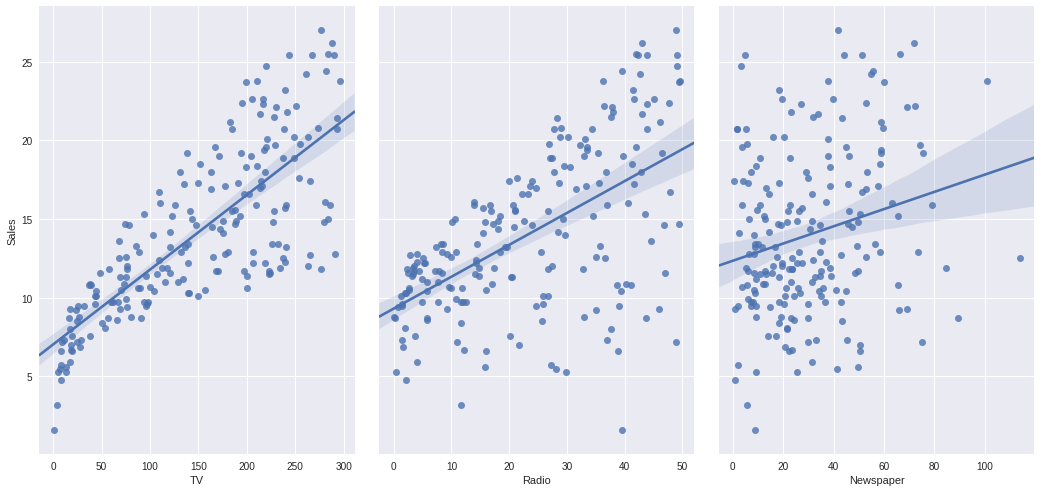

In [8]:
#using scatterplot to see the relationship between features and response
sns.pairplot( data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'reg')
# this is a good model because without the line there seems to be a linear relationship between the response
# and feature

In [9]:
# Getting the features alone into one Dataframe
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
# Getting the response into a Series
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [14]:
# Splitting X and y into two datasets just for train/test split for cross validation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [15]:
# defaults splitting ratio into 75% for training and rest for test
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [17]:
# 1. Import the class
from sklearn.linear_model import LinearRegression

# 2. Instantiate the estimator
linreg = LinearRegression()

# 3. Fit the model with data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print (linreg.intercept_)
print (linreg.coef_)


2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [26]:
feature_cols = ['TV', 'Radio', 'Newspaper']
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

### Note that these coefficient are positive which means every penny invested in that feature makes the sales (response) positive, if investment is going to cause decrease in sales, the coefficient would be negative

Similarly we can say that each "unit" investment in that feature increases or decreases the response value by the value of the coefficient.

In [30]:
# 4. Predict the response for a new observation
y_pred = linreg.predict(X_test)
# Comparing the predicted response with the true response
list(zip(y_pred, y_test))

[(21.709102923364377, 23.800000000000001),
 (16.410552432361477, 16.600000000000001),
 (7.6095505781680917, 9.5),
 (17.807695522228073, 14.800000000000001),
 (18.614635898316607, 17.600000000000001),
 (23.835739978244412, 25.5),
 (16.32488680883619, 16.899999999999999),
 (13.432255355566834, 12.9),
 (9.1717340336633164, 10.5),
 (17.333852999614862, 17.100000000000001),
 (14.444794824149172, 14.5),
 (9.8351197336669447, 11.300000000000001),
 (17.18797614256404, 17.399999999999999),
 (16.73086831420677, 16.699999999999999),
 (15.055293908580044, 13.4),
 (15.614344327661893, 15.9),
 (12.425415743446711, 12.9),
 (17.177163755427095, 12.800000000000001),
 (11.088275657294803, 9.5),
 (18.00537500751658, 18.399999999999999),
 (9.2843888853713992, 10.699999999999999),
 (12.984584582962404, 12.5),
 (8.7995061449410468, 8.5),
 (10.423824991665978, 11.5),
 (11.38464560380652, 11.9),
 (14.980825122775142, 14.9),
 (9.7885326784949616, 10.1),
 (19.396431869711627, 18.899999999999999),
 (18.180999359

In [31]:
# Computing RMSE for the Sales Prediction of the model
# RMSE is preferred over MSE and MAE because, it's in the terms of "y" units and gives the bigger impact of error.

# importing metrics for evaluating the model
from sklearn import metrics

# for finding the sqrt
import numpy as np

print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [ ]:
# Feature selection is important so accordingly RMSE value increases or decreases, we should do whatever in our power
# To decrease the value of RMSE, so therefore we can see there isn't much of help from newspaper, if we remove it
# RMSE value drops. Lower number RMSE is better, so we should try different combinations of features for lowering RMSE